# Task

Facial recognition technology has become the norm in this modern-era. It has become a mundane thing, as everybody who has an iPhone
can attest to. Indeed, Apple’s facial recognition technology is also based on deep learning [2], furthermore, its implementation is localized
on an iPhone (impressively enough).

Now Apple needed to overcome the challenges of localization due to the limitations of the iPhone (whether it be the CPU, GPU or the
limited RAM) [2]. The fact still holds that based on Apple’s implementation, an implementation is indeed possible, which perhaps can be
improved upon with the aid of better computing power. In this particular implementation, however, we will be specifically using the Yale
Facial Dataset [1] as our input and our output will classify the images based on which individual/subject is in the image, for example it
will output 1 for an image of individual 1, 2 for an image with individual 2, ETC. all the way up to 15 for images of individual 15.

####  Deliverables

Must accomplish 
1. 50 percent accuracy from test data using convolution neural networks or other models we have used in class 
2. Augmented data using blur and cropped techniques 
3. Extract skin tone as one of the features used in the neural network 

Expect to accomplish 
1. Implements random sampling from data when training model 
2. 65 percent prediction accuracy on test data 
3. Increase Data Set by adding pictures of more individuals (for a total of 20 individuals) 

Would like to accomplish 
1. 80 percent prediction accuracy on test data 
2. Include Gabor Filters or other image processing techniques as a part of our model 
3. Increase Data Set by adding pictures of more individuals (for a total of 30 individuals) 


# Data

## Approach

We will be training this dataset as a classification problem. Given a picture we would like the model to be able to predict which of the
15 people in the dataset it matches to. We plan to do our classification using a neural network model. We plan to start out by using
convolutional networks and a squared loss and then try out other types of models as well to see what works best.

## Original Data

Our data set is taken from the Yale Face Recognition Data base. This data base consists of 15 different subjects, and each subject has 11
different images that are different facial expressions resulting in 165 total images. We will split up the training and testing data sets so that
approximately 3/4 of the images are in the training set and 1/4 are in the testing set. So, for each subject, a randomly picked 7 of the 11
images will be the training set and the remaining 4 will be in the testing set. The resolution of each of these images is 243x320. For data
augmentation, we will perform a couple different augmentations. The two main augmentations are blurring the images and mirroring the
images. This allows our data set to potentially grow by 4 times, giving us more data to train the model with. 

### Display Images

Sample Images
Individual 8


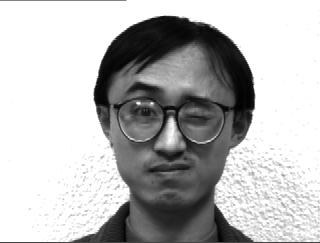

Individual 9


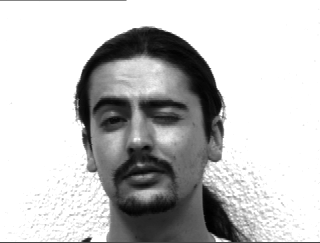

Individual 2


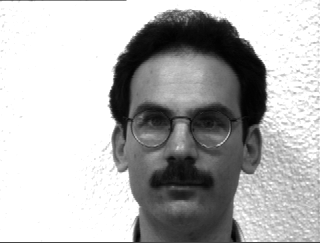

In [4]:
import numpy as np
from PIL import Image
import os
from imageprocessing_helper_functions import flatten
from sklearn.model_selection import train_test_split

#yale images
images = [f for f in os.listdir('yalefaces') if f != ".DS_Store"]
X = [Image.open("./yalefaces/" + image) for image in images]

#divide into test,dev, and train (test, train, dev)
labels = []
for image in images:
    if "subject11" in image:
        labels.append(11)
    elif "subject02" in image:
        labels.append(2)
    elif "subject03" in image:
        labels.append(3)
    elif "subject04" in image:
        labels.append(4)
    elif "subject05" in image:
        labels.append(5)
    elif "subject06" in image:
        labels.append(6)
    elif "subject07" in image:
        labels.append(7)
    elif "subject08" in image:
        labels.append(8)
    elif "subject09" in image:
        labels.append(9)
    elif "subject10" in image:
        labels.append(10)
    elif "subject15" in image:
        labels.append(15)
    elif "subject12" in image:
        labels.append(12)
    elif "subject13" in image:
        labels.append(13)
    elif "subject14" in image:
        labels.append(14)
    elif "subject01" in image:
        labels.append(1)

labels = np.array(labels)
print("Sample Images")

print("Individual %d"%(labels[0]))
display(X[0])
print("Individual %d"%(labels[1]))
display(X[1])
print("Individual %d"%(labels[2]))
display(X[2])

label = np.array(labels)
features = flatten(X)


train_features, dev_features, train_labels, dev_labels = train_test_split(features, labels, test_size=0.4, random_state=42)
dev_features, test_features, dev_labels, test_labels = train_test_split(dev_features, dev_labels, test_size=0.1, random_state=42)

### Training Set and Test Set Label Distribution

<BarContainer object of 15 artists>

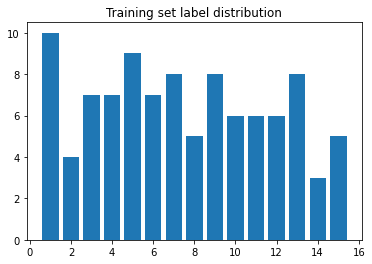

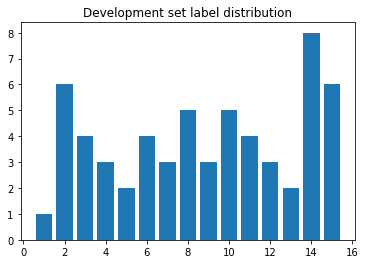

In [5]:
# imports
from collections import defaultdict 
import numpy as np
from data import load
import matplotlib.pyplot as plt 
%matplotlib inline

counts = defaultdict(int) 

for label in train_labels:
    counts[label] += 1 

plt.figure()
plt.title("Training set label distribution") 

k = counts.keys()
v = counts.values()
plt.bar(list(k), height=list(v))

dev_counts = defaultdict(int) 

for label in dev_labels:
    dev_counts[label] += 1 

plt.figure()
plt.title("Development set label distribution") 
dk = dev_counts.keys()
dv = dev_counts.values()
plt.bar(list(dk), height=list(dv))

Label distribution not quite uniform so might need to look into domain adaptation techniques, but this is not implemented in this particular method/experiment

## Data Augmentation

There are not enough images in the training set for a model to be train to a sufficient degree that it will be able to predict an image well with some labels having as few as 2 images, thus, the data must be augmented. In this particular case, Mirroring and Blurring operations (only on the original) are employed to increase the training dataset by 3 times (*did not blur mirrored image)

### Blurring

Sample blurred Images
Blurred Individual 8


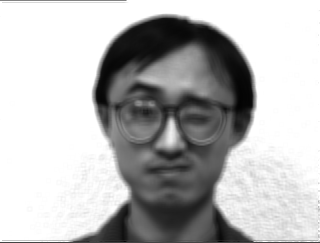

Blurred Individual 9


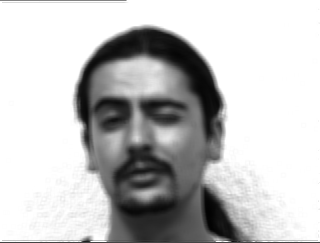

Blurred Individual 2


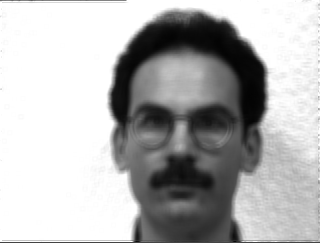

In [6]:
from imageprocessing_helper_functions import blurred, mirrored

X_blurred, label_blurred = blurred(X, labels)
label_blurred = np.array(label_blurred)

print("Sample blurred Images")

print("Blurred Individual %d"%(labels[0]))
display(X_blurred[0])
print("Blurred Individual %d"%(labels[1]))
display(X_blurred[1])
print("Blurred Individual %d"%(labels[2]))
display(X_blurred[2])


### Mirroring

Sample mirrored Images
Mirrored Individual 8


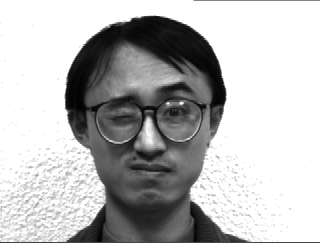

Mirrored Individual 9


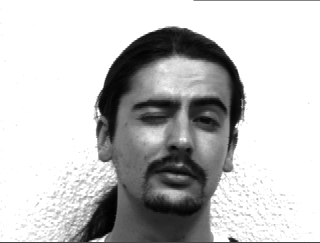

Mirrored Individual 2


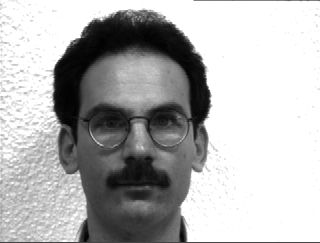

In [7]:
X_mirrored, label_mirrored = mirrored(X, labels)
label_mirrored = np.array(label_mirrored)

print("Sample mirrored Images")

print("Mirrored Individual %d"%(labels[0]))
display(X_mirrored[0])
print("Mirrored Individual %d"%(labels[1]))
display(X_mirrored[1])
print("Mirrored Individual %d"%(labels[2]))
display(X_mirrored[2])

### Rotating

Sample rotated Images
Rotated Individual 8


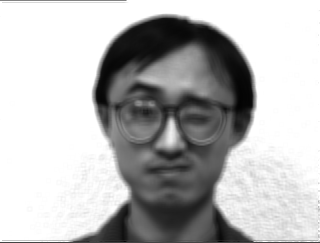

Rotated Individual 9


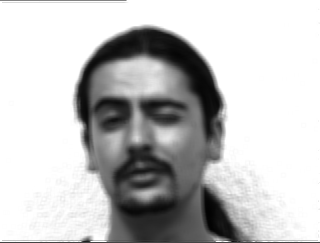

Rotated Individual 2


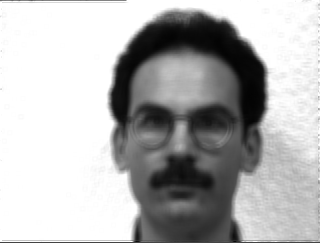

In [6]:
from PIL import Image
import os
import tensorflow as tf
from tensorflow import keras

X_blurred, label_blurred = blurred(X, labels)
label_blurred = np.array(label_blurred)

print("Sample rotated Images")

print("Rotated Individual %d"%(labels[0]))
display(X_rotated[0])
print("Rotated Individual %d"%(labels[1]))
display(X_rotated[1])
print("Rotated Individual %d"%(labels[2]))
display(X_rotated[2])


### Eigenfaces

 Each image is originally a 243 by 320 dimension images with 8 bit gray scale values. When a convolutional neural network was used to train on the data, the runtime was found out to be too slow for any significant progress to be made. 

 A valid comparison from past experience with dealing with image data is from HW3, using the Fashion MNIST dataset, the images in that data are 28 by 28, however, they are grayscale, similar to that of the Yale Face database. 

In [8]:
size_yale = 234 * 320
size_Fashion = 28 * 28

print("size of yale images is %d pixels, and size of fashion images is %d pixels"%(size_yale, size_Fashion) )

print("yale images are %0.2f times bigger than fashion images"%(size_yale/size_Fashion))

size of yale images is 74880 pixels, and size of fashion images is 784 pixels
yale images are 95.51 times bigger than fashion images


 This means that one Yale Database image is equivalent in size to around 95 Fashion images meaning that training on 100 Yale Face images is equivalent to training on 9500 of the Fashion Images.

 In the past HW3 training batch size is recommended to be at 100 which at this size training still took a long time for a sufficiently deep neural network which is required to achieve good result, however, the equivalent of 100 images in HW3 is demonstrate to be 1 image in this dataset size-wise, thus, it is clear that a good result can never be achieved at this size since for sure not all outcomes will be explored (15 outcomes as 15 people to be identified) (at least initially)

Thus, PCA technique (Principle Component Analysis) is used to retain only the most significant axes of variability (eigenvectors of the empirical covariance matrix). This enable us to reduce from 74480 features to only 100 which is even lesser than the features in HW3

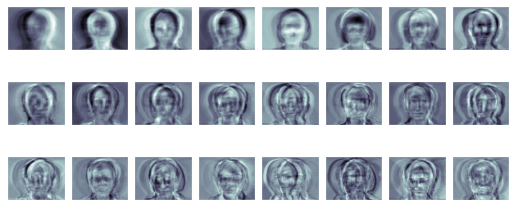

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import decomposition
import csv
import argparse as ap
import random

import numpy as np



# load data
train_data = np.load(f'train.feats.npy')
train_labels = np.load(f'train.labels.npy')

pca = decomposition.PCA()
pca.fit(train_data)
train_data = pca.transform(train_data)

fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(243, 320), cmap='bone')

# Model

Initially, approach was to solely use the convolutional neural network on the data, however, this might be a naive assumption where images are assumed to be best handled only by a neural network. Furthermore, after the PCA decomposition, data's features are reduced in a way that it might be more straightforward to work directly with the features produced from the PCA decomposition without further reformulation. 

Thus, many models are employed, in an effort to find the best model for this particular dataset and in the application of facial recognition. 

## Convolutional Neural Network Model

#### Description

We first attenpted to train the model using the same neural network that had been best on the data in class. We also used the PCA technique here. Here is the snippet of code showing the layout of the neural net:

class BestNN(torch.nn.Module):
    def __init__(self, n1_channels, n1_kernel, n2_channels, n2_kernel, pool1,
                 n3_channels, n3_kernel, n4_channels, n4_kernel, pool2, linear_features):
        super(BestNN, self).__init__()
        self.sequence1 = nn.Sequential(
            nn.Conv2d(1, n1_channels, n1_kernel),
            nn.BatchNorm2d(n1_channels),
            nn.ReLU(),
            nn.Conv2d(n1_channels, n2_channels, n2_kernel),
            nn.BatchNorm2d(n2_channels),
            nn.ReLU(),
        )

    def forward(self, x):
        x = x.reshape([x.size(0), 1, 10, 12]) #reshape to 2d images
        x = self.sequence1(x)
        self.sequence2 = nn.Sequential(
            nn.MaxPool2d(x.size(2))
            )
        x = self.sequence2(x)
        x = x.reshape(x.size(0), -1) #resize to 1 vector with length of 10 for each example in batch 
        return x

In [18]:
!python main.py train --data-dir ./faces --log-file ./best-logs.csv --model-save ./best.torch --model best

On step 0: Train loss 4.836712837219238 | Dev acc is 0.011342155009451797
On step 100: Train loss 0.6206836104393005 | Dev acc is 0.08506616257088846

main.py:163: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (y == y_hat).astype(np.float).mean()



On step 200: Train loss 0.303556889295578 | Dev acc is 0.0831758034026465
On step 300: Train loss 0.2471441775560379 | Dev acc is 0.07372400756143667
On step 400: Train loss 0.07811369746923447 | Dev acc is 0.07939508506616257
On step 500: Train loss 0.15538126230239868 | Dev acc is 0.08128544423440454
On step 600: Train loss 0.07546880841255188 | Dev acc is 0.0831758034026465
On step 700: Train loss 0.06938668340444565 | Dev acc is 0.06994328922495274
On step 800: Train loss 0.13126762211322784 | Dev acc is 0.08506616257088846
On step 900: Train loss 0.13665412366390228 | Dev acc is 0.07372400756143667
On step 1000: Train loss 0.051192328333854675 | Dev acc is 0.07939508506616257
On step 1100: Train loss 0.07660456746816635 | Dev acc is 0.07939508506616257
On step 1200: Train loss 0.027586642652750015 | Dev acc is 0.0888468809073724
On step 1300: Train loss 0.10922179371118546 | Dev acc is 0.07561436672967864
On step 1400: Train loss 0.04241551086306572 | Dev acc is 0.085066162570888

#### Description

In [17]:

!python main.py train --data-dir ./facesmod --log-file ./best-logs.csv --model-save ./best.torch --model best

On step 0: Train loss 3.995718479156494 | Dev acc is 0.02835538752362949

main.py:163: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (y == y_hat).astype(np.float).mean()



On step 100: Train loss 1.2741748094558716 | Dev acc is 0.0888468809073724
On step 200: Train loss 0.47337210178375244 | Dev acc is 0.08695652173913043
On step 300: Train loss 0.34404173493385315 | Dev acc is 0.08506616257088846
On step 400: Train loss 0.12064637988805771 | Dev acc is 0.08506616257088846
On step 500: Train loss 0.279146283864975 | Dev acc is 0.08128544423440454
On step 600: Train loss 0.37741485238075256 | Dev acc is 0.08128544423440454
On step 700: Train loss 0.044896405190229416 | Dev acc is 0.08506616257088846
On step 800: Train loss 0.1718878149986267 | Dev acc is 0.08506616257088846
On step 900: Train loss 0.10579290241003036 | Dev acc is 0.08695652173913043
On step 1000: Train loss 0.05681375786662102 | Dev acc is 0.08128544423440454
On step 1100: Train loss 0.22517815232276917 | Dev acc is 0.08695652173913043
On step 1200: Train loss 0.02648814581334591 | Dev acc is 0.09262759924385633
On step 1300: Train loss 0.022949127480387688 | Dev acc is 0.085066162570888

#### Analysis

While both classifiers performed slightly above average, and adding more data increased the accuracy slightly, neither classifier worked well at all as they both had very low accuracy. We therefore decided to move away from neural networks and to try other methods instead.

## MLP Classifer

#### Description

MLP(multilayer perceptron) classifier is a feedforward artificial neural network method in supervised learning. It maps a set of input vectors to a set of output vectors. MLP can be thought of as a directed graph consisting of multiple layers of nodes, each of which is fully connected to the next layer. Except for the input nodes, each neuron (or processing unit) is with a nonlinear activation function. A method called backpropagation algorithm is often used to train MLP. It first learns, then store data based on weights, and uses algorithms to adjust weights and reduce bias during training, where bias is the difference between actual and predicted values. The main advantage of using MLP is first, it is able to solve complex problems quickly. Second, as the improvement of perceptron, it overcomes the weakness that perceptron cannot recognize linear non-fractional data. Since this model is relatively simple, we apply it first as a benchmark.

In [51]:
import numpy as np
from data import load
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from PIL import Image as im
from imageprocessing_helper_functions import blurred, mirrored, flatten
from sklearn.metrics import confusion_matrix



train_data, train_labels = load("yalefaces_npy", split="train")
dev_data, dev_labels = load("yalefaces_npy", split="dev")

X = []

for i in range(0, np.shape(train_data)[0]):
    array = np.reshape(train_data[i,:], (243, 320))
    data = im.fromarray(array, mode = 'L')
    X.append(data)

label = train_labels
features = train_data

#blur images
X_blurred, label_blurred = blurred(X, label)
label_blurred = np.array(label_blurred)
features_blurred = flatten(X_blurred)

#mirror images
X_mirrored, label_mirrored = mirrored(X, label)
label_mirrored = np.array(label_mirrored)
features_mirrored = flatten(X_mirrored)

#combined
features_combined = np.concatenate((features, features_blurred))
labels_combined = np.concatenate((label, label_blurred))
features_combined = np.concatenate((features_combined, features_mirrored))
labels_combined = np.concatenate((labels_combined, label_mirrored))

# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(features_combined)

# apply PCA transformation
X_train_pca = pca.transform(features_combined)
X_test_pca = pca.transform(dev_data)

train_labels = np.ravel(labels_combined)
dev_labels = np.ravel(dev_labels)


print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=100, verbose=True, early_stopping=True).fit(X_train_pca, train_labels)

y_pred = clf.predict(X_test_pca)
print(classification_report(dev_labels, y_pred))

Fitting the classifier to the training set
Iteration 1, loss = 2.73414597
Validation score: 0.305556
Iteration 2, loss = 2.14814709
Validation score: 0.361111
Iteration 3, loss = 1.76861994
Validation score: 0.361111
Iteration 4, loss = 1.52325820
Validation score: 0.416667
Iteration 5, loss = 1.34015491
Validation score: 0.444444
Iteration 6, loss = 1.21741513
Validation score: 0.388889
Iteration 7, loss = 1.12597173
Validation score: 0.388889
Iteration 8, loss = 1.05652998
Validation score: 0.472222
Iteration 9, loss = 1.00147335
Validation score: 0.472222
Iteration 10, loss = 0.95501368
Validation score: 0.444444
Iteration 11, loss = 0.91634176
Validation score: 0.444444
Iteration 12, loss = 0.88016287
Validation score: 0.444444
Iteration 13, loss = 0.85043521
Validation score: 0.444444
Iteration 14, loss = 0.82328526
Validation score: 0.472222
Iteration 15, loss = 0.79888459
Validation score: 0.472222
Iteration 16, loss = 0.77719356
Validation score: 0.500000
Iteration 17, loss = 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Accuracy = (TP + TN)/(TP + TN + FP + FN)
* Precision (a.k.a. Sensitivity)= TP/(TP + FP)
* Recall (a.k.a. True Positive Rate) = TP/(TP + FN)
* Specificity = TN/(TN + FP)
* False Positive Rate = FP/(FP + TN)

* F1 Score = 2*(Precision * Recall)/(Precision + Recall)
* Balanced Accuracy = (Sensitivity + Specificity)/2

#### HyperParameter Search

TODO

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

print("Current Parameters are: \n")
print(clf.get_params())

print("Hyperparameters to tune: \n")
param_grid = {'activation': ['relu', 'tanh'],
              'alpha': [1, 0.1, 0.01, 0.001, .0001],
              'beta_1': [0.9, .92, .94, .96, .98, 1],
             }

clf_new = MLPClassifier(max_iter=100)

grid_search = GridSearchCV(estimator = clf_new, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train_pca, train_labels)
print(grid_search.best_params_)


y_pred = grid_search.predict(X_test_pca)
print(classification_report(dev_labels, y_pred))

Current Parameters are: 

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 100, 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (1024,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': True, 'warm_start': False}
Hyperparameters to tune: 

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   18.0s finished


{'activation': 'relu', 'alpha': 0.001, 'beta_1': 0.98}
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         1
         3.0       0.67      1.00      0.80         2
         4.0       1.00      1.00      1.00         2
         5.0       0.00      0.00      0.00         1
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         3
         8.0       0.50      1.00      0.67         1
         9.0       1.00      0.67      0.80         3
        10.0       1.00      1.00      1.00         1
        12.0       1.00      1.00      1.00         3
        13.0       1.00      1.00      1.00         1
        15.0       1.00      1.00      1.00         2

    accuracy                           0.91        23
   macro avg       0.86      0.90      0.87        23
weighted avg       0.91      0.91      0.90        23



/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM Classifier

#### Description

SVM is a supervised learning model that works in both classification and regression analysis problems. Given a set of observation, each training instance is marked as belonging to one or another of the two categories. SVM trains to classify a new instance to one of two categories of models, making it to be a binary linear classifier. The SVM model is to represent instances as points in space, so that the mapping separates instances of separate categories by the widest apparent interval possible, and then map new instances into the same space and predict the category based on which side of the interval they fall on. More importantly, if the raw data is not linearly seperable, kernel funciton is able to map non-linear separable data into a higher dimensional space which could make our data linear separable.

#### Implementation and Results

In [54]:
from sklearn import svm
import numpy as np
from data import load
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from PIL import Image as im
from imageprocessing_helper_functions import blurred, mirrored, flatten
from sklearn.metrics import confusion_matrix



train_data, train_labels = load("yalefaces_npy", split="train")
dev_data, dev_labels = load("yalefaces_npy", split="dev")

X = []

for i in range(0, np.shape(train_data)[0]):
    array = np.reshape(train_data[i,:], (243, 320))
    data = im.fromarray(array, mode = 'L')
    X.append(data)

label = train_labels
features = train_data

#blur images
X_blurred, label_blurred = blurred(X, label)
label_blurred = np.array(label_blurred)
features_blurred = flatten(X_blurred)

#mirror images
X_mirrored, label_mirrored = mirrored(X, label)
label_mirrored = np.array(label_mirrored)
features_mirrored = flatten(X_mirrored)

#combined
features_combined = np.concatenate((features, features_blurred))
labels_combined = np.concatenate((label, label_blurred))
features_combined = np.concatenate((features_combined, features_mirrored))
labels_combined = np.concatenate((labels_combined, label_mirrored))

# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(features_combined)

# apply PCA transformation
X_train_pca = pca.transform(features_combined)
X_test_pca = pca.transform(dev_data)

train_labels = np.ravel(labels_combined)
dev_labels = np.ravel(dev_labels)


print("Fitting the classifier to the training set")
clf = svm.SVC(C=5, gamma=0.001).fit(X_train_pca, train_labels)

y_pred = clf.predict(X_test_pca)
print(classification_report(dev_labels, y_pred))


Fitting the classifier to the training set
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         2
         4.0       1.00      1.00      1.00         2
         5.0       1.00      1.00      1.00         1
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         3
         8.0       0.33      1.00      0.50         1
         9.0       1.00      0.67      0.80         3
        10.0       1.00      1.00      1.00         1
        12.0       1.00      1.00      1.00         3
        13.0       1.00      1.00      1.00         1
        15.0       1.00      0.50      0.67         2

    accuracy                           0.91        23
   macro avg       0.95      0.94      0.92        23
weighted avg       0.97      0.91      0.92        23



* Accuracy = (TP + TN)/(TP + TN + FP + FN)
* Precision (a.k.a. Sensitivity)= TP/(TP + FP)
* Recall (a.k.a. True Positive Rate) = TP/(TP + FN)
* Specificity = TN/(TN + FP)
* False Positive Rate = FP/(FP + TN)

* F1 Score = 2*(Precision * Recall)/(Precision + Recall)
* Balanced Accuracy = (Sensitivity + Specificity)/2

#### HyperParameter Search

TO BE FINISHED (Not sure what's going on here)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

print("Current Parameters are: \n")
print(clf.get_params())

print("Hyperparameters to tune: \n")
param_grid = {'C': [.01, .1, 1, 5],
              'gamma': [.1, .01, .001, .0001],
              'kernel': ['rbf']}

clf_new = svm.SVC()

grid_search = GridSearchCV(estimator = clf_new, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train_pca, train_labels)
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test_pca)
print(classification_report(dev_labels, y_pred))

Current Parameters are: 

{'C': 5, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Hyperparameters to tune: 

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00         3
         8.0       0.04      1.00      0.08         1
         9.0       0.00      0.00      0.00         3
        10.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         3
        13.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         2

    accuracy                           0.04        23
   macro avg       0.00      0.08      0.01        23
weighted avg       0.00      0.04      0.00        23



[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.5s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest Classifier

#### Description

The random forest classifier combines multiple decision trees into one classifier. This allows a very simple classification method to be mode more effective. Random forest classifiers often work well as built within existing libraries, therefore they are simple to test on data, and avoid having to spend alot of time tailoring a model to your specific needs. In previous studies Random Forest models have been shown to perform up to as good as SVM classifiers.

#### Implementation and Results

In [10]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from data import load
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from PIL import Image as im
from imageprocessing_helper_functions import blurred, mirrored, flatten
from sklearn.metrics import confusion_matrix



train_data, train_labels = load("yalefaces_npy", split="train")
dev_data, dev_labels = load("yalefaces_npy", split="dev")

X = []

for i in range(0, np.shape(train_data)[0]):
    array = np.reshape(train_data[i,:], (243, 320))
    data = im.fromarray(array, mode = 'L')
    X.append(data)

label = train_labels
features = train_data

#blur images
X_blurred, label_blurred = blurred(X, label)
label_blurred = np.array(label_blurred)
features_blurred = flatten(X_blurred)

#mirror images
X_mirrored, label_mirrored = mirrored(X, label)
label_mirrored = np.array(label_mirrored)
features_mirrored = flatten(X_mirrored)

#combined
features_combined = np.concatenate((features, features_blurred))
labels_combined = np.concatenate((label, label_blurred))
features_combined = np.concatenate((features_combined, features_mirrored))
labels_combined = np.concatenate((labels_combined, label_mirrored))

# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(features_combined)

# apply PCA transformation
X_train_pca = pca.transform(features_combined)
X_test_pca = pca.transform(dev_data)

train_labels = np.ravel(labels_combined)
dev_labels = np.ravel(dev_labels)


print("Fitting the classifier to the training set")
clf = RandomForestClassifier().fit(X_train_pca, train_labels)

y_pred = clf.predict(X_test_pca)
print(classification_report(dev_labels, y_pred))

Fitting the classifier to the training set
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.50      1.00      0.67         1
         3.0       0.50      1.00      0.67         2
         4.0       0.67      1.00      0.80         2
         5.0       0.00      0.00      0.00         1
         6.0       1.00      1.00      1.00         2
         7.0       0.00      0.00      0.00         3
         8.0       0.25      1.00      0.40         1
         9.0       0.67      0.67      0.67         3
        10.0       1.00      1.00      1.00         1
        12.0       1.00      0.67      0.80         3
        13.0       0.00      0.00      0.00         1
        15.0       1.00      0.50      0.67         2

    accuracy                           0.61        23
   macro avg       0.51      0.60      0.51        23
weighted avg       0.57      0.61      0.55        23



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### HyperParameter Search

TO BE FINISHED

In [45]:
from sklearn.model_selection import GridSearchCV

print("Current Parameters are: \n")
print(clf.get_params())

print("Hyperparameters to tune: \n")
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 70, 90, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100, 200, 300, 1000]
}

clf_new = RandomForestClassifier()

grid_search = GridSearchCV(estimator = clf_new, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train_pca, train_labels)
grid_search.best_params_

y_pred = grid_search.predict(X_test_pca)
print(classification_report(dev_labels, y_pred))

Current Parameters are: 

{'C': 5, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Hyperparameters to tune: 

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  2.2min finished


              precision    recall  f1-score   support

         1.0       0.33      1.00      0.50         1
         2.0       1.00      1.00      1.00         1
         3.0       1.00      0.50      0.67         2
         4.0       1.00      1.00      1.00         2
         5.0       0.00      0.00      0.00         1
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         3
         8.0       0.25      1.00      0.40         1
         9.0       1.00      0.33      0.50         3
        10.0       1.00      1.00      1.00         1
        12.0       1.00      0.33      0.50         3
        13.0       1.00      1.00      1.00         1
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         2

    accuracy                           0.65        23
   macro avg       0.68      0.65      0.61        23
weighted avg       0.81      0.65      0.66        23



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNeighbors Regressor

#### Description

The random forest classifier combines multiple decision trees into one classifier. This allows a very simple classification method to be mode more effective. Random forest classifiers often work well as built within existing libraries, therefore they are simple to test on data, and avoid having to spend alot of time tailoring a model to your specific needs. In previous studies Random Forest models have been shown to perform up to as good as SVM classifiers.

In [57]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from data import load
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from PIL import Image as im
from imageprocessing_helper_functions import blurred, mirrored, flatten
from sklearn.metrics import confusion_matrix

train_data, train_labels = load("yalefaces_npy", split="train")
dev_data, dev_labels = load("yalefaces_npy", split="dev")

X = []

for i in range(0, np.shape(train_data)[0]):
    array = np.reshape(train_data[i,:], (243, 320))
    data = im.fromarray(array, mode = 'L')
    X.append(data)

label = train_labels
features = train_data

#blur images
X_blurred, label_blurred = blurred(X, label)
label_blurred = np.array(label_blurred)
features_blurred = flatten(X_blurred)

#mirror images
X_mirrored, label_mirrored = mirrored(X, label)
label_mirrored = np.array(label_mirrored)
features_mirrored = flatten(X_mirrored)

#combined
features_combined = np.concatenate((features, features_blurred))
labels_combined = np.concatenate((label, label_blurred))
features_combined = np.concatenate((features_combined, features_mirrored))
labels_combined = np.concatenate((labels_combined, label_mirrored))

# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(features_combined)

# apply PCA transformation
X_train_pca = pca.transform(features_combined)
X_test_pca = pca.transform(dev_data)

train_labels = np.ravel(labels_combined)
dev_labels = np.ravel(dev_labels)


print("Fitting the classifier to the training set")
clf = KNeighborsClassifier().fit(X_train_pca, train_labels)

y_pred = clf.predict(X_test_pca)
print(classification_report(dev_labels, y_pred))

Fitting the classifier to the training set
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       1.00      1.00      1.00         1
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         1
         6.0       1.00      1.00      1.00         2
         7.0       0.00      0.00      0.00         3
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         3
        10.0       0.00      0.00      0.00         1
        12.0       0.17      0.33      0.22         3
        13.0       1.00      1.00      1.00         1
        15.0       0.00      0.00      0.00         2

    accuracy                           0.22        23
   macro avg       0.24      0.26      0.25        23
weighted avg       0.20      0.22      0.20        23



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### HyperParameter Search

TO BE FINISHED

In [62]:
from sklearn.model_selection import GridSearchCV

print("Current Parameters are: \n")
print(clf.get_params())

print("Hyperparameters to tune: \n")
param_grid = {
    'leaf_size': [1, 10, 30, 50, 70, 90],
    'n_neighbors': [1, 2, 3, 4, 5, 6],
    'metric': ['minkowski', 'euclidean']
}
    
clf_new = KNeighborsClassifier()

grid_search = GridSearchCV(estimator = clf_new, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train_pca, train_labels)
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test_pca)
print(classification_report(dev_labels, y_pred))

Current Parameters are: 

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Hyperparameters to tune: 

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s


{'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 6}
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       1.00      1.00      1.00         1
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         1
         6.0       1.00      1.00      1.00         2
         7.0       0.17      0.33      0.22         3
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         3
        10.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         3
        13.0       1.00      1.00      1.00         1
        15.0       0.00      0.00      0.00         2

    accuracy                           0.22        23
   macro avg       0.24      0.26      0.25        23
weighted avg       0.20      0.22      0.20        23



[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    2.1s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Resiliency

### Original + 5 More Individuals

Sample Images
Individual 19


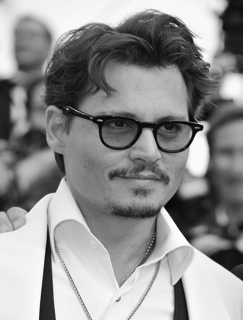

Individual 18


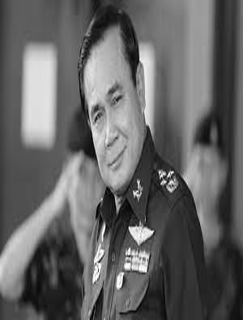

Individual 16


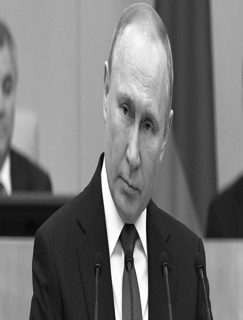

In [4]:
import numpy as np
from PIL import Image, ImageOps
import os
from imageprocessing_helper_functions import flatten

def FiveMoreImages():

    #images convert to grayscale and resized
    images = [f for f in os.listdir('Augmented_With_5_More') if f != ".DS_Store"]
    X = [Image.open("./Augmented_With_5_More/" + image) for image in images]
    for i in range(0, len(X)):
        X[i] = ImageOps.grayscale(X[i])
        X[i] = X[i].resize((243,320))



    label = []
    for image in images:
        if "putin" in image: #subject 16 is Putin
            label.append(16)
        elif "obama" in image: #subject 17 is Obama
            label.append(17)
        elif "prayuth" in image: #subject 18 is General Prayuth
            label.append(18)
        elif "Depp" in image: #subject 19 is Johnny Depp
            label.append(19)
        elif "kim" in image: #subject 20 is Kim Jong Un
            label.append(20)

    label = np.array(label)
    features = flatten(X)
    
    print("Sample Images")

    print("Individual %d"%(label[0]))
    display(X[0])
    print("Individual %d"%(label[1]))
    display(X[1])
    print("Individual %d"%(label[3]))
    display(X[3])
    
FiveMoreImages()

<BarContainer object of 18 artists>

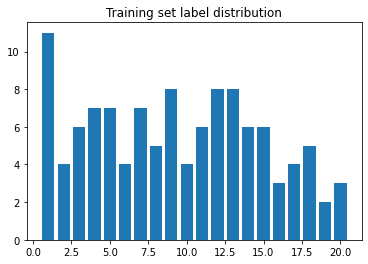

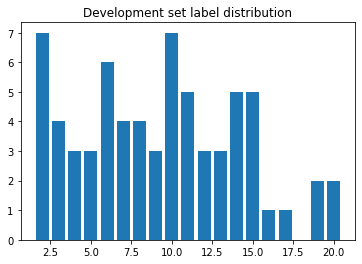

In [5]:
import numpy as np
from PIL import Image
import os
from imageprocessing_helper_functions import flatten
from sklearn.model_selection import train_test_split
from DifferentFormatImages import FiveMoreImages

#yale images
images = [f for f in os.listdir('yalefaces') if f != ".DS_Store"]
X = [Image.open("./yalefaces/" + image) for image in images]

#divide into test,dev, and train (test, train, dev)
label = []
for image in images:
    if "subject11" in image:
        label.append(11)
    elif "subject02" in image:
        label.append(2)
    elif "subject03" in image:
        label.append(3)
    elif "subject04" in image:
        label.append(4)
    elif "subject05" in image:
        label.append(5)
    elif "subject06" in image:
        label.append(6)
    elif "subject07" in image:
        label.append(7)
    elif "subject08" in image:
        label.append(8)
    elif "subject09" in image:
        label.append(9)
    elif "subject10" in image:
        label.append(10)
    elif "subject15" in image:
        label.append(15)
    elif "subject12" in image:
        label.append(12)
    elif "subject13" in image:
        label.append(13)
    elif "subject14" in image:
        label.append(14)
    elif "subject01" in image:
        label.append(1)

label = np.array(label)
features = flatten(X)

features_fivemore, label_fivemore = FiveMoreImages()

#combined
features_combined = np.concatenate((features, features_fivemore))
labels_combined = np.concatenate((label, label_fivemore))


train_features, dev_features, train_labels, dev_labels = train_test_split(features_combined, labels_combined, test_size=0.4, random_state=42)
dev_features, test_features, dev_labels, test_labels = train_test_split(dev_features, dev_labels, test_size=0.1, random_state=42)

from collections import defaultdict 
import numpy as np
from data import load
import matplotlib.pyplot as plt 
%matplotlib inline

counts = defaultdict(int) 

for label in train_labels:
    counts[label] += 1 

plt.figure()
plt.title("Training set label distribution") 

k = counts.keys()
v = counts.values()
plt.bar(list(k), height=list(v))

dev_counts = defaultdict(int) 

for label in dev_labels:
    dev_counts[label] += 1 

plt.figure()
plt.title("Development set label distribution") 
dk = dev_counts.keys()
dv = dev_counts.values()
plt.bar(list(dk), height=list(dv))

Most images are converted to grayscale from RGB and to the same dimension as that of the Yale Face Database images just so that the new info can be easily integrated in the same methodology as before, however, as can be observed the integrity of the height to width ratio is not conserved!

Label distribution is again not quite uniform so might need to look into domain adaptation techniques, but this is not implemented in this particular method/experiment

#### Best Model (MLP Classifier) On This Dataset

In [11]:
import numpy as np
from data import load
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from PIL import Image as im
from imageprocessing_helper_functions import blurred, mirrored, flatten
from sklearn.metrics import confusion_matrix



train_data, train_labels = load("yalefaces_npy_fivemore", split="train")
dev_data, dev_labels = load("yalefaces_npy_fivemore", split="dev")

X = []

for i in range(0, np.shape(train_data)[0]):
    array = np.reshape(train_data[i,:], (243, 320))
    data = im.fromarray(array, mode = 'L')
    X.append(data)

label = train_labels
features = train_data

#blur images
X_blurred, label_blurred = blurred(X, label)
label_blurred = np.array(label_blurred)
features_blurred = flatten(X_blurred)

#mirror images
X_mirrored, label_mirrored = mirrored(X, label)
label_mirrored = np.array(label_mirrored)
features_mirrored = flatten(X_mirrored)

#combined
features_combined = np.concatenate((features, features_blurred))
labels_combined = np.concatenate((label, label_blurred))
features_combined = np.concatenate((features_combined, features_mirrored))
labels_combined = np.concatenate((labels_combined, label_mirrored))

# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(features_combined)

# apply PCA transformation
X_train_pca = pca.transform(features_combined)
X_test_pca = pca.transform(dev_data)

train_labels = np.ravel(labels_combined)
dev_labels = np.ravel(dev_labels)


print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=100, early_stopping=True).fit(X_train_pca, train_labels)

y_pred = clf.predict(X_test_pca)
print(classification_report(dev_labels, y_pred))

Fitting the classifier to the training set
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.75      0.43      0.55         7
           3       1.00      0.50      0.67         4
           4       1.00      0.67      0.80         3
           5       0.33      0.33      0.33         3
           6       1.00      0.83      0.91         6
           7       0.00      0.00      0.00         4
           8       0.75      0.75      0.75         4
           9       0.50      0.67      0.57         3
          10       1.00      0.57      0.73         7
          11       0.50      0.60      0.55         5
          12       0.50      1.00      0.67         3
          13       1.00      0.33      0.50         3
          14       1.00      0.80      0.89         5
          15       0.80      0.80      0.80         5
          16       0.00      0.00      0.00         1
          17       0.00      0.00     

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_cla

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

print("Current Parameters are: \n")
print(clf.get_params())

print("Hyperparameters to tune: \n")
param_grid = {'activation': ['relu', 'tanh'],
              'alpha': [1, 0.1, 0.01, 0.001, .0001],
              'beta_1': [0.9, .92, .94, .96, .98, 1],
             }

clf_new = MLPClassifier(max_iter=100)

grid_search = GridSearchCV(estimator = clf_new, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train_pca, train_labels)
print(grid_search.best_params_)


y_pred = grid_search.predict(X_test_pca)
print(classification_report(dev_labels, y_pred))

Current Parameters are: 

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 100, 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (1024,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Hyperparameters to tune: 

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.05555556 0.04385965 0.05847953 0.06140351 0.04678363        nan
 0.05263158 0.08479532 0.04093567 0.06432749 0.04678363        nan
 0.09064327 0.04678363 0.04093567 0.04678363 0.06432749        nan
 0.02339181 0.08187135 0.07017544 0.02631579 0.04093567        nan
 0.05847953 0.0380117  0.0380117  0.0877193  0.07894737        nan
 0.04093567 0.08479532 0.06432749 0.05555556 0.08187135        nan
 0.02631579 0.02339181 0.04678363 0.04093567 0.04385965        nan
 0.04678363 0.0497076  0.06140351 0.0380117  0.05263158        nan
 0.03216374 0.0380117  0.02631579 0.0497076  0.06140351        nan
 0.02339181 0.0380117  0.04678363 0.07017544 0.06725146        nan]
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reach

{'activation': 'relu', 'alpha': 0.01, 'beta_1': 0.9}
              precision    recall  f1-score   support

           2       1.00      0.86      0.92         7
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      0.83      0.91         6
           7       0.80      1.00      0.89         4
           8       1.00      0.75      0.86         4
           9       0.60      1.00      0.75         3
          10       0.88      1.00      0.93         7
          11       1.00      1.00      1.00         5
          12       0.50      1.00      0.67         3
          13       0.50      0.67      0.57         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.00     

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Analysis and Conclusion

// TODO:
BEST MODEL, STATISTICS COMPARISION, POTENTIAL JUSTIFICATION OF WHY IS BEST MODEL

GO THROUGH DELIVERABLES SEE WHAT IS COMPLETED AND WHAT IS NOT THEN GIVE JUSTIFICATION TO WHY
//

# Citation

[1] “UCSD Computer Vision.” Yale Face Database, http://vision.ucsd.edu/content/yale-face-database.

[2] “An on-Device Deep Neural Network for Face Detection.” Apple Machine Learning Research, https://machinelearning.apple.com/research/face-
detection.
